# Supervised Learning

In this section, we will work with the IMDB dataset. we can download the dataset using the provided [link](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/code).

The task involves classifying comments into two categories: positive and negative.


#### Naive Bayes

Write a Naive Bayes classifier class and complete the implementation of its functions.



In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

class NaiveBayes():
    def __init__(self, count_vectorizer, alpha=1):
        super().__init__()
        self.cv = count_vectorizer
        self.alpha = alpha
        self.num_classes = None
        self.classes = None
        self.prior = None
        self.feature_probabilities = None

    def fit(self, x, y):
        """
        Fit the features and the labels
        Calculate prior and feature probabilities

        Parameters
        ----------
        x: np.ndarray
            An m * n matrix - m is count of docs and n is embedding size

        y: np.ndarray
            The real class label for each doc

        Returns
        -------
        self
            Returns self as a classifier
        """
        self.classes = np.unique(y)
        self.num_classes = len(self.classes)
        self.prior = np.zeros(self.num_classes)
        self.feature_probabilities = np.zeros((self.num_classes, x.shape[1]))

        # Calculate prior probabilities
        for idx, c in enumerate(self.classes):
            self.prior[idx] = np.sum(y == c) / len(y)

        # Calculate feature probabilities
        for idx, c in enumerate(self.classes):
            x_c = x[y == c]
            self.feature_probabilities[idx, :] = (np.sum(x_c, axis=0) + self.alpha) / (np.sum(x_c) + self.alpha * x.shape[1])

        return self

    def predict(self, x):
        """
        Parameters
        ----------
        x: np.ndarray
            An k * n matrix - k is count of docs and n is embedding size
        Returns
        -------
        np.ndarray
            Return the predicted class for each doc
            with the highest probability (argmax)
        """
        log_probs = np.log(self.prior) + x @ np.log(self.feature_probabilities.T)
        return self.classes[np.argmax(log_probs, axis=1)]

    def prediction_report(self, x, y):
        """
        Parameters
        ----------
        x: np.ndarray
            An k * n matrix - k is count of docs and n is embedding size
        y: np.ndarray
            The real class label for each doc
        Returns
        -------
        str
            Return the classification report
        """
        y_pred = self.predict(x)
        return classification_report(y, y_pred)

    def get_percent_of_positive_reviews(self, sentences):
        """
        we have to override this method because we are using a different embedding method in this class.
        """
        positive_count = np.sum(sentences == 'positive')
        return positive_count / len(sentences)

    def load_data(self, file_path):
        """
        Load the data from the csv file and preprocess the text. Then save the normalized tokens and the sentiment labels.
        """
        df = pd.read_csv(file_path)
        df['review'] = df['review'].astype(str)  # Ensure all reviews are strings
        x = df['review'].values
        y = df['sentiment'].values
        return x, y

    def split_data(self, x, y, test_data_ratio=0.2):
        """
        Split the data into training and testing data.

        Parameters
        ----------
        x: np.ndarray
            The features (reviews)
        y: np.ndarray
            The labels (sentiments)
        test_data_ratio: float
            The ratio of the test data
        Returns
        -------
        np.ndarray, np.ndarray, np.ndarray, np.ndarray
            Return the training and testing data for the embeddings and the sentiments.
            in the order of x_train, x_test, y_train, y_test
        """
        return train_test_split(x, y, test_size=test_data_ratio, random_state=42)


if __name__ == '__main__':
    # Load data
    vectorizer = CountVectorizer()
    nb_classifier = NaiveBayes(count_vectorizer=vectorizer)

    # Load and preprocess data
    x, y = nb_classifier.load_data('IMDB Dataset.csv')

    # Fit the CountVectorizer
    x_vectorized = vectorizer.fit_transform(x)

    # Split data
    x_train, x_test, y_train, y_test = nb_classifier.split_data(x_vectorized, y)

    # Fit the Naive Bayes model
    nb_classifier.fit(x_train, y_train)

    # Predict and print the classification report
    report = nb_classifier.prediction_report(x_test, y_test)
    print(report)


              precision    recall  f1-score   support

    negative       0.83      0.88      0.85      4961
    positive       0.87      0.82      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



#### SVM
Write an SVM classifier to perform classification on the IMDB dataset.



In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv("IMDB Dataset.csv")

print(data.head())

# missing values
data.dropna(subset=["review", "sentiment"], inplace=True)

# Encode sentiment labels 
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

# Split data
X = data['review']
y = data['sentiment']

# training/testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# text to TF-IDF 
tfidf_vectorizer = CountVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train 
svm_clf = LinearSVC(random_state=42)
svm_clf.fit(X_train_tfidf, y_train)

# Predict 
y_pred = svm_clf.predict(X_test_tfidf)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


c:\Users\HAMAHANG\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy: 0.8494

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      5000
           1       0.85      0.85      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



c:\Users\HAMAHANG\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### KNN
Write an KNN classifier to perform classification on the IMDB dataset.



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load our IMDB dataset
data = pd.read_csv("IMDB Dataset.csv")

# Check for missing values and drop them
data.dropna(subset=["review", "sentiment"], inplace=True)

# Encode sentiment labels (positive -> 1, negative -> 0)
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

# Split data into features and labels
X = data['review']
y = data['sentiment']

# Range of k values to try
k_values = range(1, 13, 2)  # Test k from 1 to 20
accuracy_scores = []

for k in k_values:
    # Train a KNN classifier for each k
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train_tfidf, y_train)
    
    # Predict on test data
    y_pred = knn_clf.predict(X_test_tfidf)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"k={k}, Accuracy={accuracy:.4f}")

# Find the best k
best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print(f"\nBest k: {best_k} with Accuracy: {max(accuracy_scores):.4f}")



k=1, Accuracy=0.5861
k=3, Accuracy=0.5815
k=5, Accuracy=0.5901
k=7, Accuracy=0.5939
k=9, Accuracy=0.5929
k=11, Accuracy=0.5993

Best k: 11 with Accuracy: 0.5993


#### Conclusion


1. **Performance**:
   - Both Naive Bayes and SVM show similar and strong performance with an accuracy of 0.85, while KNN struggles with a maximum accuracy of 0.5993.
   
2. **Precision and Recall**:
   - Naive Bayes has slightly higher precision for positive reviews (0.87) compared to SVM (0.85), but both classifiers have similar recall and F1-scores.
   - SVM maintains a balanced performance across both classes, while Naive Bayes has a slight imbalance.

3. **KNN Limitations**:
   - The KNN results indicate that this algorithm may not be suitable for our dataset, possibly due to the high dimensionality or the nature of the data.
   - KNN's performance can be sensitive to the choice of k and the distance metric used, and it generally requires more tuning and preprocessing.


# Unsupervised Learning

In this section, we will work with the *Breast Cancer* and *Fruit* datasets provided by `scikit-learn`.

## Dimensionality Reduction and Manifold Learning

#### PCA on Breast Cancer Dataset

Use PCA to find the **2** principal components of the Breast Cancer Dataset.



In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Labels

# Standardize 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convert to a DataFrame
df_pca = pd.DataFrame(data=X_pca, columns=["Principal Component 1", "Principal Component 2"])
df_pca["Target"] = y

print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.44272026 0.18971182]


##### Plotting
Plot the PCA-transformed version of the Breast Cancer Dataset



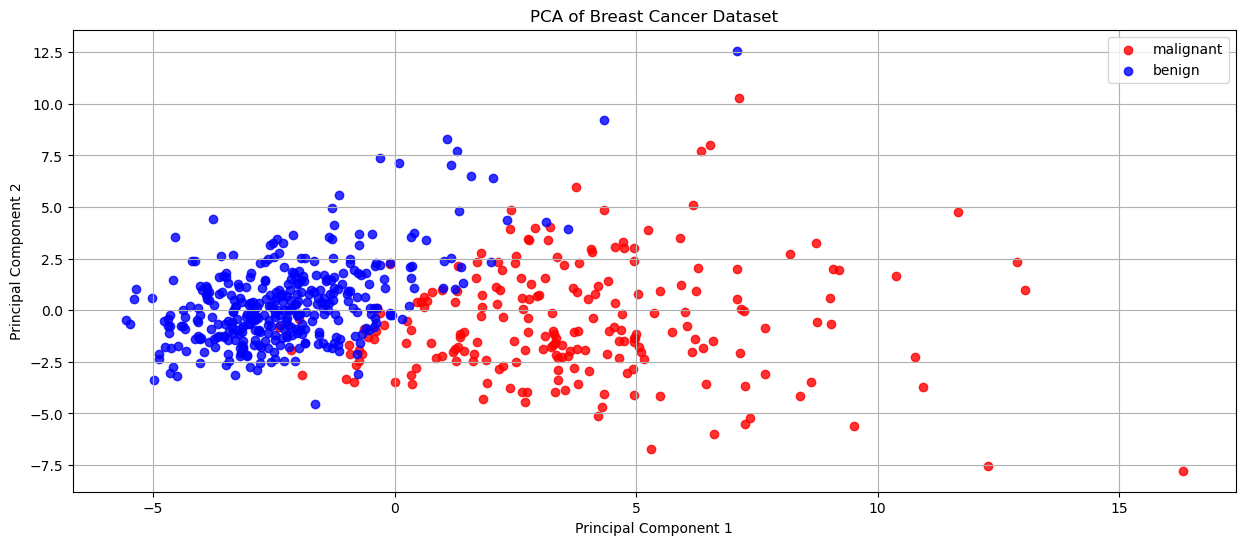

In [12]:
plt.figure(figsize=(15, 6))
colors = ['red', 'blue']
for target, color in zip(data.target_names, colors):
    plt.scatter(df_pca[df_pca["Target"] == list(data.target_names).index(target)]["Principal Component 1"],
                df_pca[df_pca["Target"] == list(data.target_names).index(target)]["Principal Component 2"],
                alpha=0.8, label=target, color=color)

plt.title("PCA of Breast Cancer Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

Plot the magnitude of each feature value for the first two principal components. This mean we will have to plot the contribution of each feature in the original dataset, to each PCA component.



#### PCA on the Fruit Dataset

Use PCA to find the **2** principal components of the Fruit dataset.



Explained Variance Ratio: [0.39286954 0.29431216]


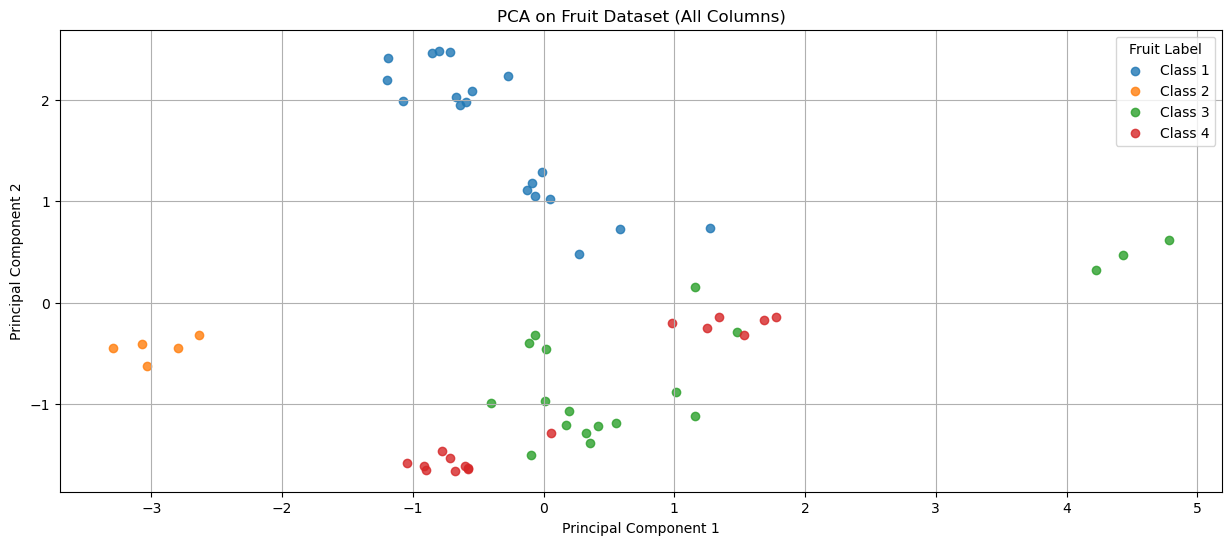

In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data = pd.read_csv("fruit_data_with_colors.txt", sep="\t")

# Convert categorical columns to numeric
label_encoders = {}
for col in ['fruit_name', 'fruit_subtype']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  

X = data.drop(columns=["fruit_label"])  # Use all columns except the label for PCA
y = data["fruit_label"]  # Labels for visualization

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
df_pca = pd.DataFrame(data=X_pca, columns=["Principal Component 1", "Principal Component 2"])
df_pca["Label"] = y

# Explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Plot the PCA results
plt.figure(figsize=(15, 6))
for label in sorted(df_pca["Label"].unique()):
    plt.scatter(
        df_pca[df_pca["Label"] == label]["Principal Component 1"],
        df_pca[df_pca["Label"] == label]["Principal Component 2"],
        label=f"Class {label}",
        alpha=0.8
    )

plt.title("PCA on Fruit Dataset (All Columns)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Fruit Label")
plt.grid(True)
plt.show()


## Manifold learning methods

Multidimensional scaling (MDS) seeks a low-dimensional representation of the data in which the distances respect well the distances in the original high-dimensional space.
In general, MDS is a technique used for analyzing similarity or dissimilarity data. It attempts to model similarity or dissimilarity data as distances in a geometric spaces. The data can be ratings of similarity between objects, interaction frequencies of molecules, or trade indices between countries.

#####  Multidimensional scaling (MDS) on the Fruit dataset

Perform Multidimensional scaling (MDS) on the Fruit dataset.



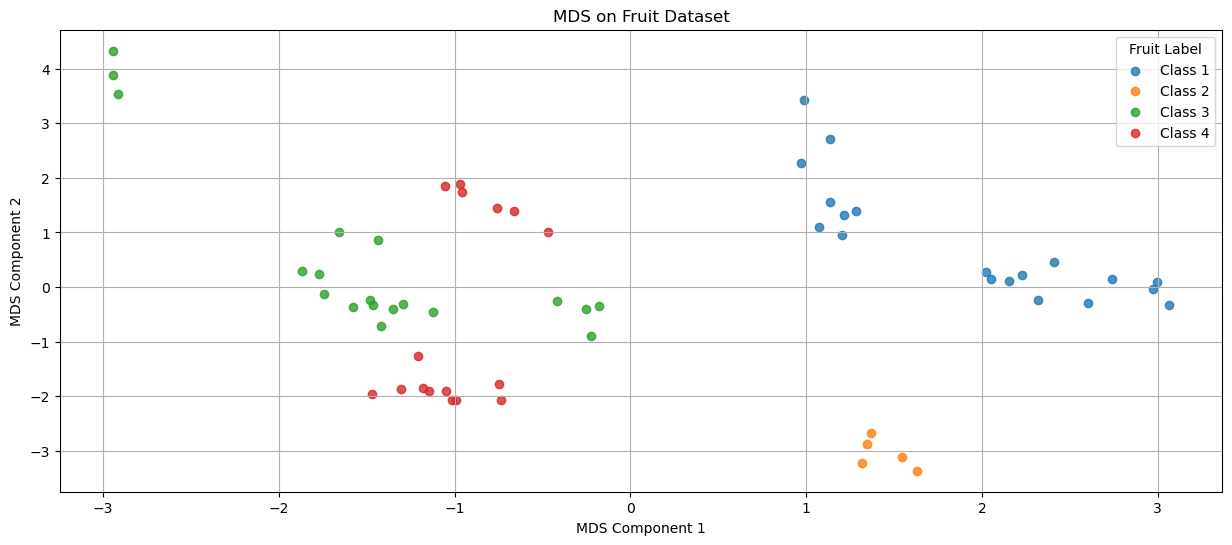

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

data = pd.read_csv("fruit_data_with_colors.txt", sep="\t")

# Convert categorical to numeric 
label_encoders = {}
for col in ['fruit_name', 'fruit_subtype']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  

X = data.drop(columns=["fruit_label"]) 
y = data["fruit_label"]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply MDS to reduce dimensions to 2
mds = MDS(n_components=2, random_state=42, dissimilarity="euclidean", normalized_stress=False)
X_mds = mds.fit_transform(X_scaled)

df_mds = pd.DataFrame(data=X_mds, columns=["MDS Component 1", "MDS Component 2"])
df_mds["Label"] = y

plt.figure(figsize=(15, 6))
for label in sorted(df_mds["Label"].unique()):
    plt.scatter(
        df_mds[df_mds["Label"] == label]["MDS Component 1"],
        df_mds[df_mds["Label"] == label]["MDS Component 2"],
        label=f"Class {label}",
        alpha=0.8
    )

plt.title("MDS on Fruit Dataset")
plt.xlabel("MDS Component 1")
plt.ylabel("MDS Component 2")
plt.legend(title="Fruit Label")
plt.grid(True)
plt.show()


##### Multidimensional scaling (MDS) on the Breast Cancer dataset

Perform Multidimensional scaling (MDS) on the Breast Cancer dataset.



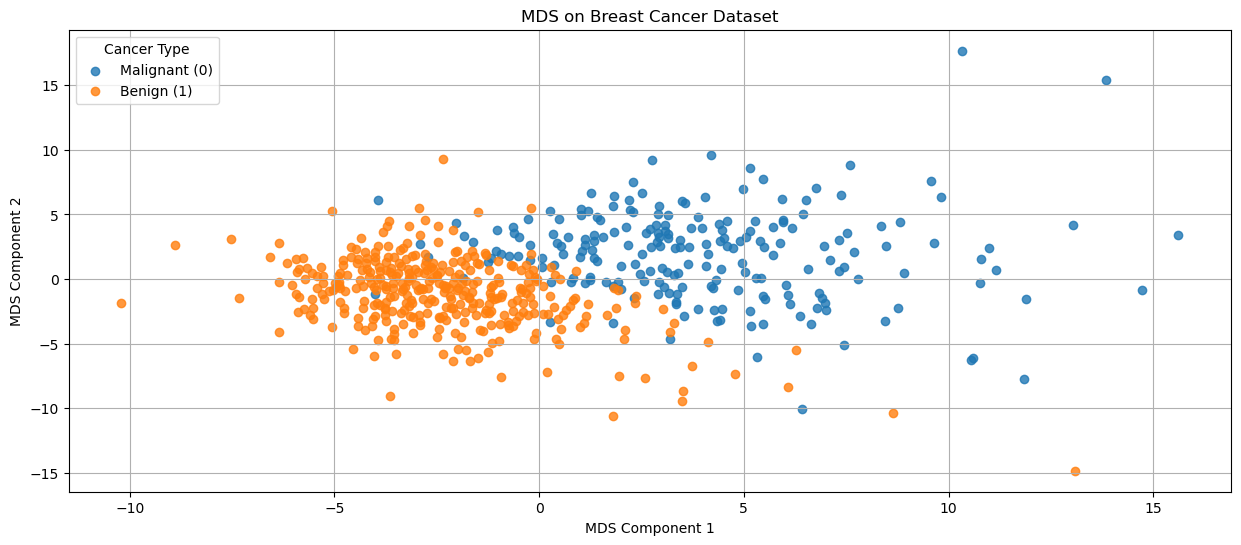

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
import pandas as pd
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data 
y = data.target 

# Standardize 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply MDS to reduce dimensions to 2
mds = MDS(n_components=2, random_state=42, dissimilarity="euclidean", normalized_stress=False)
X_mds = mds.fit_transform(X_scaled)

# Create a DataFrame
df_mds = pd.DataFrame(data=X_mds, columns=["MDS Component 1", "MDS Component 2"])
df_mds["Label"] = y

plt.figure(figsize=(15, 6))
for label in sorted(df_mds["Label"].unique()):
    plt.scatter(
        df_mds[df_mds["Label"] == label]["MDS Component 1"],
        df_mds[df_mds["Label"] == label]["MDS Component 2"],
        label=f"Class {label}",
        alpha=0.8
    )

plt.title("MDS on Breast Cancer Dataset")
plt.xlabel("MDS Component 1")
plt.ylabel("MDS Component 2")
plt.legend(title="Cancer Type", labels=["Malignant (0)", "Benign (1)"])
plt.grid(True)
plt.show()


##### t-SNE on the Fruit Dataset

t-SNE ([`TSNE`](https://scikit-learn.org/1.5/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE)) converts affinities of data points to probabilities. The affinities in the original space are represented by Gaussian joint probabilities and the affinities in the embedded space are represented by Student’s t-distributions. This allows t-SNE to be particularly sensitive to local structure and has a few other advantages over existing techniques:

* Revealing the structure at many scales on a single map

* Revealing data that lie in multiple, different, manifolds or clusters

* Reducing the tendency to crowd points together at the center

t-SNE will focus on the local structure of the data and will tend to extract clustered local groups of samples as highlighted on the S-curve example. This ability to group samples based on the local structure might be beneficial to visually disentangle a dataset that comprises several manifolds at once as is the case in the digits dataset.

The Kullback-Leibler (KL) divergence of the joint probabilities in the original space and the embedded space will be minimized by gradient descent. Note that the KL divergence is not convex, i.e. multiple restarts with different initializations will end up in local minima of the KL divergence. Hence, it is sometimes useful to try different seeds and select the embedding with the lowest KL divergence.

The disadvantages to using t-SNE are roughly:

1. t-SNE is computationally expensive, and can take several hours on million-sample datasets where PCA will finish in seconds or minutes

2. The Barnes-Hut t-SNE method is limited to two or three dimensional embeddings.

3. The algorithm is stochastic and multiple restarts with different seeds can yield different embeddings. However, it is perfectly legitimate to pick the embedding with the least error.

4. Global structure is not explicitly preserved. This problem is mitigated by initializing points with PCA (using `init='pca'`).

Perform t-SNE on the Fruit dataset.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB
None


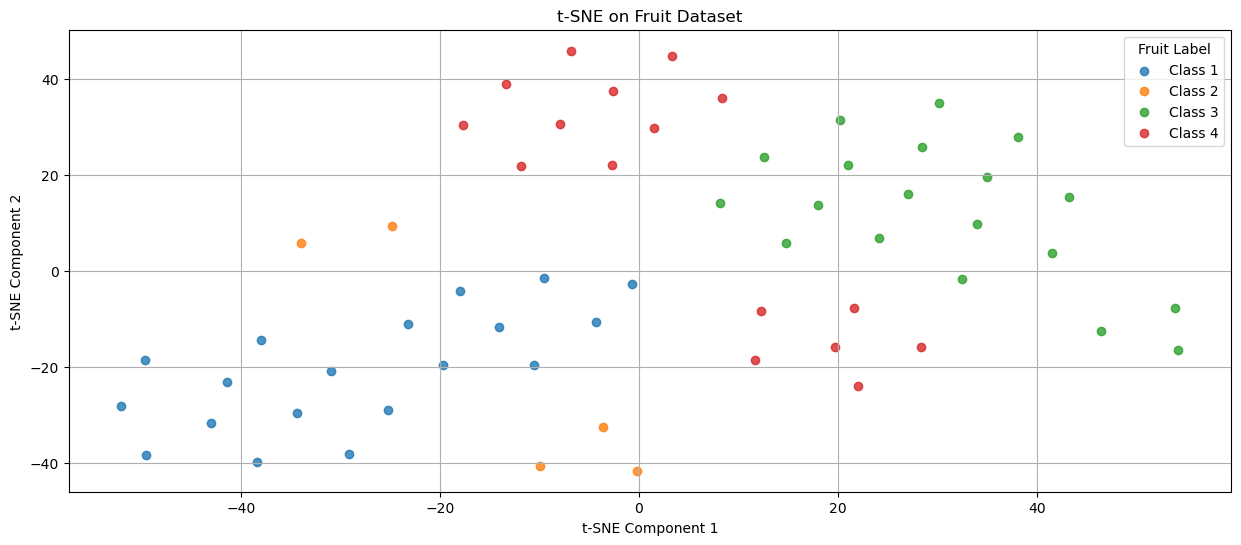

In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

data = pd.read_csv("fruit_data_with_colors.txt", sep="\t")
print(data.info())
# Convert categorical columns to numeric
label_encoders = {}
for col in ['fruit_name', 'fruit_subtype']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

X = data.drop(columns=["fruit_label"])  
y = data["fruit_label"]  

# Standardize 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE to reduce dimensions to 2
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X_scaled)

# Create a DataFrame
df_tsne = pd.DataFrame(data=X_tsne, columns=["t-SNE Component 1", "t-SNE Component 2"])
df_tsne["Label"] = y

plt.figure(figsize=(15, 6))
for label in sorted(df_tsne["Label"].unique()):
    plt.scatter(
        df_tsne[df_tsne["Label"] == label]["t-SNE Component 1"],
        df_tsne[df_tsne["Label"] == label]["t-SNE Component 2"],
        label=f"Class {label}",
        alpha=0.8
    )

plt.title("t-SNE on Fruit Dataset")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Fruit Label")
plt.grid(True)
plt.show()


##### t-SNE on the Breast Cancer dataset

Perform t-SNE on the Breast Cancer dataset.



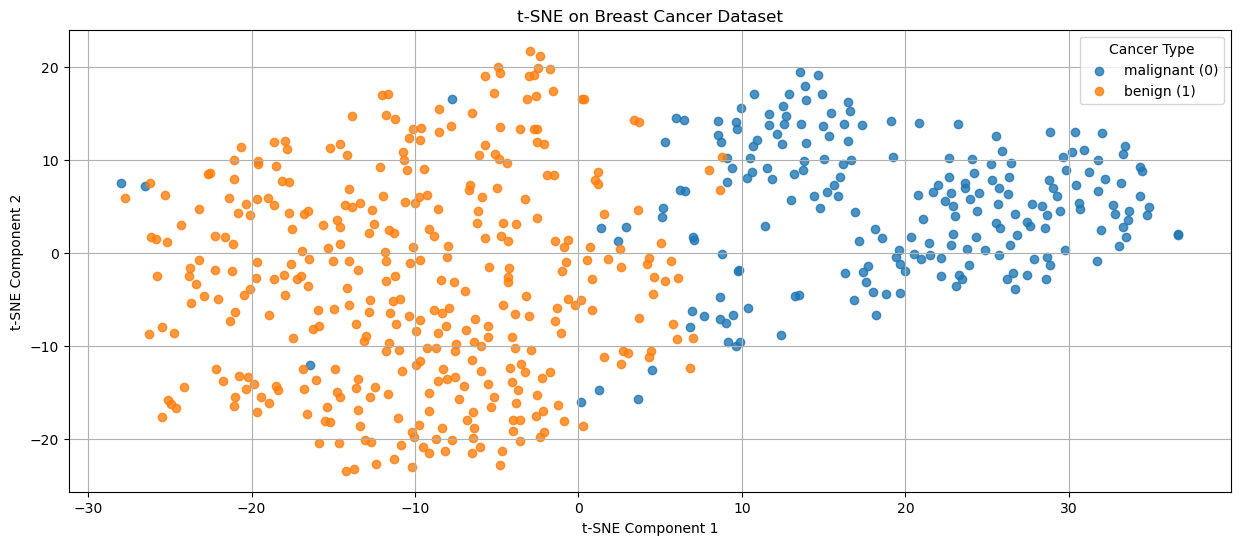

In [35]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data  
y = data.target  

# Standardize 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE to reduce dimensions to 2
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X_scaled)

# Create a DataFrame
df_tsne = pd.DataFrame(data=X_tsne, columns=["t-SNE Component 1", "t-SNE Component 2"])
df_tsne["Label"] = y

plt.figure(figsize=(15, 6))
for label in sorted(df_tsne["Label"].unique()):
    plt.scatter(
        df_tsne[df_tsne["Label"] == label]["t-SNE Component 1"],
        df_tsne[df_tsne["Label"] == label]["t-SNE Component 2"],
        label=f"{data.target_names[label]} ({label})",
        alpha=0.8
    )

plt.title("t-SNE on Breast Cancer Dataset")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Cancer Type")
plt.grid(True)
plt.show()


## Compare results for Breast Cancer dataset

1. **PCA**:
   - The PCA plot shows a clear separation between the malignant (red) and benign (blue) samples along the first principal component (PC1).
   - The malignant samples are clustered on the right side of the plot, while the benign samples are clustered on the left side.
   - This suggests that the first principal component is able to capture the most significant differences between the malignant and benign samples, indicating that the dataset has good separability between the two classes.

2. **MDS**:
   - The MDS plot also shows a clear separation between the malignant (orange) and benign (blue) samples.
   - The malignant samples are clustered on the right side of the plot, while the benign samples are clustered on the left side.
   - The separation between the two classes is more pronounced along the first MDS component (MDS1), indicating that this component is the most informative for distinguishing between malignant and benign samples.

3. **t-SNE**:
   - The t-SNE plot reveals a similar separation between the malignant (orange) and benign (blue) samples.
   - The malignant samples are clustered together, while the benign samples are also grouped together, with some overlap between the two classes.
   - The t-SNE plot provides a more detailed and granular visualization of the data, allowing for the identification of potential subgroups or clusters within the malignant and benign samples.

Overall, the results from the PCA, MDS, and t-SNE visualizations consistently show a clear separation between the malignant and benign breast cancer samples. This suggests that the dataset has strong discriminative power, and the features used in the analysis are effective in distinguishing between the two cancer types.

The PCA and MDS plots provide a more global view of the data, highlighting the primary directions of variance and separation between the classes. The t-SNE plot, on the other hand, offers a more detailed and local view, potentially revealing additional insights into the underlying structure of the data.